In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [43]:
df=pd.read_csv("./dataset/TCS.csv",index_col='Date',parse_dates=True)

In [44]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
2004-08-26,TCS,EQ,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2004-08-27,TCS,EQ,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
2004-08-30,TCS,EQ,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
2004-08-31,TCS,EQ,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172


In [45]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [46]:
numerical_data=df.select_dtypes(include=['float64','int64']).columns

In [47]:
categorical_data=df.select_dtypes(include=['object']).columns

In [48]:
df['Date']=df.index

In [49]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

rate of return is defined as the closing value subtracted from the previos close value divided by previous close value multiplied by 100

Return=[(Close-Prev Close)/Prev Close]x100

In [50]:
df['return']=((df['Close']-df['Prev Close'])/df['Prev Close'])*100

In [51]:
df=df.loc[mask]

In [52]:
df=df.ffill()

In [53]:
df['return'].isnull().values.any()

False

In [54]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,return
Date,,,,,,,,,,,,,,,,
2011-01-03,TCS,EQ,1165.65,1167.00,1176.95,1154.55,1158.00,1158.05,1162.96,702521,8.170044e+13,NaN,424604,0.6044,2011-01-03,-0.651997
2011-01-04,TCS,EQ,1158.05,1163.90,1166.15,1138.10,1142.10,1144.75,1154.16,1251434,1.444351e+14,NaN,704124,0.5627,2011-01-04,-1.148482
2011-01-05,TCS,EQ,1144.75,1145.25,1165.90,1141.75,1160.00,1158.95,1154.89,1534837,1.772569e+14,NaN,917295,0.5976,2011-01-05,1.240446
2011-01-06,TCS,EQ,1158.95,1168.00,1182.00,1153.10,1181.00,1171.70,1164.40,1423360,1.657362e+14,NaN,885495,0.6221,2011-01-06,1.100134
2011-01-07,TCS,EQ,1171.70,1176.00,1186.85,1138.15,1139.50,1142.65,1159.82,1266362,1.468753e+14,NaN,661873,0.5227,2011-01-07,-2.479304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,TCS,EQ,2908.75,2909.00,2921.35,2883.20,2908.95,2909.35,2902.86,1807144,5.245887e+14,76405.0,569310,0.3150,2020-12-24,0.020627
2020-12-28,TCS,EQ,2909.35,2910.00,2949.70,2902.00,2932.10,2929.40,2929.11,2108994,6.177467e+14,106481.0,717415,0.3402,2020-12-28,0.689157
2020-12-29,TCS,EQ,2929.40,2920.00,2952.00,2920.00,2935.00,2930.50,2937.59,1994151,5.857996e+14,99597.0,926286,0.4645,2020-12-29,0.037550


In [55]:
df=df.drop(columns=['Date','Symbol','Series'])

In [56]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-01-03,1165.65,1167.00,1176.95,1154.55,1158.00,1158.05,1162.96,702521,8.170044e+13,NaN,424604,0.6044,-0.651997
2011-01-04,1158.05,1163.90,1166.15,1138.10,1142.10,1144.75,1154.16,1251434,1.444351e+14,NaN,704124,0.5627,-1.148482
2011-01-05,1144.75,1145.25,1165.90,1141.75,1160.00,1158.95,1154.89,1534837,1.772569e+14,NaN,917295,0.5976,1.240446
2011-01-06,1158.95,1168.00,1182.00,1153.10,1181.00,1171.70,1164.40,1423360,1.657362e+14,NaN,885495,0.6221,1.100134
2011-01-07,1171.70,1176.00,1186.85,1138.15,1139.50,1142.65,1159.82,1266362,1.468753e+14,NaN,661873,0.5227,-2.479304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2908.75,2909.00,2921.35,2883.20,2908.95,2909.35,2902.86,1807144,5.245887e+14,76405.0,569310,0.3150,0.020627
2020-12-28,2909.35,2910.00,2949.70,2902.00,2932.10,2929.40,2929.11,2108994,6.177467e+14,106481.0,717415,0.3402,0.689157
2020-12-29,2929.40,2920.00,2952.00,2920.00,2935.00,2930.50,2937.59,1994151,5.857996e+14,99597.0,926286,0.4645,0.037550


In [57]:
df.dropna(inplace=True)

<AxesSubplot:>

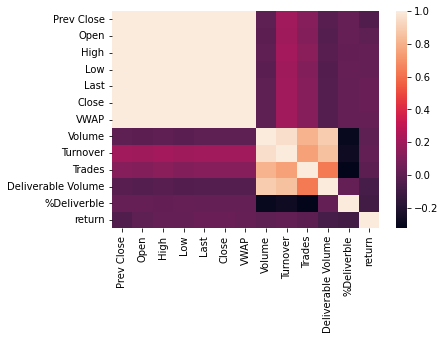

In [58]:
sn.heatmap(df.corr())

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2502, freq='B')

In [61]:
df=df.ffill(axis=0)
df['return'].isnull().values.any()

False

In [62]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-06-01,1157.15,1157.0,1177.00,1157.00,1174.70,1175.40,1171.25,491193.0,5.753106e+13,24427.0,235463.0,0.4794,1.577151
2011-06-02,1175.40,1158.9,1172.00,1156.65,1170.00,1167.75,1163.45,848827.0,9.875700e+13,31879.0,505320.0,0.5953,-0.650842
2011-06-03,1167.75,1166.0,1175.00,1150.00,1153.00,1152.10,1157.15,683904.0,7.913794e+13,21179.0,416548.0,0.6091,-1.340184
2011-06-06,1152.10,1140.0,1168.00,1140.00,1167.00,1164.35,1156.70,678537.0,7.848626e+13,20965.0,373937.0,0.5511,1.063276
2011-06-07,1164.35,1163.0,1183.15,1158.00,1180.00,1179.30,1175.19,918721.0,1.079673e+14,26487.0,598039.0,0.6509,1.283978
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2908.75,2909.0,2921.35,2883.20,2908.95,2909.35,2902.86,1807144.0,5.245887e+14,76405.0,569310.0,0.3150,0.020627
2020-12-28,2909.35,2910.0,2949.70,2902.00,2932.10,2929.40,2929.11,2108994.0,6.177467e+14,106481.0,717415.0,0.3402,0.689157
2020-12-29,2929.40,2920.0,2952.00,2920.00,2935.00,2930.50,2937.59,1994151.0,5.857996e+14,99597.0,926286.0,0.4645,0.037550


In [63]:
train=df.iloc[:2250,12]
test=df.iloc[2250:,12]

In [64]:
Decomp_results=seasonal_decompose(df['return'])

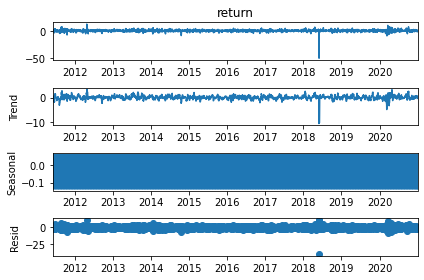

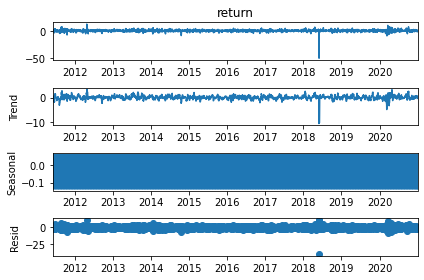

In [65]:
Decomp_results.plot()

In [66]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:2250]
exo_test=exo.iloc[2250:]


In [67]:
exo=exo.asfreq('B')

In [68]:
exo.ffill()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
Date,,,,,,,,,,,
2011-06-01,1157.15,1157.0,1177.00,1157.00,1174.70,1175.40,1171.25,491193.0,5.753106e+13,24427.0,235463.0
2011-06-02,1175.40,1158.9,1172.00,1156.65,1170.00,1167.75,1163.45,848827.0,9.875700e+13,31879.0,505320.0
2011-06-03,1167.75,1166.0,1175.00,1150.00,1153.00,1152.10,1157.15,683904.0,7.913794e+13,21179.0,416548.0
2011-06-06,1152.10,1140.0,1168.00,1140.00,1167.00,1164.35,1156.70,678537.0,7.848626e+13,20965.0,373937.0
2011-06-07,1164.35,1163.0,1183.15,1158.00,1180.00,1179.30,1175.19,918721.0,1.079673e+14,26487.0,598039.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2908.75,2909.0,2921.35,2883.20,2908.95,2909.35,2902.86,1807144.0,5.245887e+14,76405.0,569310.0
2020-12-28,2909.35,2910.0,2949.70,2902.00,2932.10,2929.40,2929.11,2108994.0,6.177467e+14,106481.0,717415.0
2020-12-29,2929.40,2920.0,2952.00,2920.00,2935.00,2930.50,2937.59,1994151.0,5.857996e+14,99597.0,926286.0


In [69]:
exo=np.nan_to_num(exo)

In [70]:
from pmdarima import auto_arima

In [71]:
auto_arima(df['return'],exogenous=exo,m=1,trace=True,D=1).summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3837.250, Time=2.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3819.607, Time=1.60 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3820.935, Time=2.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3820.887, Time=2.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20894.389, Time=1.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3821.577, Time=2.67 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 13.413 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:                        SARIMAX   Log Likelihood               -1896.803
Date:                Sat, 04 Jun 2022   AIC                           3819.607
Time:                        00:50:19   BIC                           3895.330
Sample:                             0   HQIC                          3847.096
                               - 2502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0014   1.37e-32  -1.03e+29      0.000      -0.001      -0.001
x1            -0.0314   2.33e-29  -1.35e+27      0.000      -0.031      -0.031
x2            -0.0119   2.19e-29  -5.42e+26      0.000      -0.012      -0.012
x3            -0.0038   2.26e-29  -1.68e+26      0.000      -0.004      -0.004
x4            -0.0007   2.16e-29  -3.21e+25      0.000      -0.001      -0.001
x5             0.0019   2.22e-29   8.77e+25      0.000       0.002       0.002
x6             0.0469   2.22e-29   2.11e+27      0.000       0.047       0.047
x7            -0.0011   2.22e-29  -4.78e+25      0.000      -0.001      -0.001
x8          1.115e-07   7.34e-26   1.52e+18      0.000    1.11e-07    1.11e-07
x9         -2.555e-16   1.35e-17    -18.957      0.000   -2.82e-16   -2.29e-16
x10        -2.319e-07   2.26e-27  -1.03e+20      0.000   -2.32e-07   -2.32e-07
x11        -6.034e-08   3.65e-26  -1.65e+18      0.000   -6.03e-08   -6.03e-08
sigma2         0.2667   1.83e-32   1.46e+31      0.000       0.267       0.267
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):             78793.07
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.49e+46. Standard errors may be unstable.
"""

In [72]:
import statsmodels.api as sm

In [73]:
model=sm.tsa.arima.ARIMA(train,exog=exo_train,order=(0,0,0))

Model=model.fit()

Model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 return   No. Observations:                 2250
Model:                          ARIMA   Log Likelihood               -9231.199
Date:                Sat, 04 Jun 2022   AIC                          18488.397
Time:                        00:50:21   BIC                          18562.740
Sample:                    06-01-2011   HQIC                         18515.532
                         - 01-14-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.054e-05   5.09e-29  -4.04e+23      0.000   -2.05e-05   -2.05e-05
Prev Close            -0.0307   7.63e-26  -4.02e+23      0.000      -0.031      -0.031
Open                  -0.0131   7.29e-26  -1.79e+23      0.000      -0.013      -0.013
High                  -0.0026   7.49e-26  -3.46e+22      0.000      -0.003      -0.003
Low                   -0.0004   7.19e-26  -5.84e+21      0.000      -0.000      -0.000
Last                   0.0014   7.39e-26   1.94e+22      0.000       0.001       0.001
Close                  0.0457   7.39e-26   6.19e+23      0.000       0.046       0.046
VWAP                  -0.0004   7.35e-26  -5.19e+21      0.000      -0.000      -0.000
Volume              1.213e-07   2.25e-22   5.39e+14      0.000    1.21e-07    1.21e-07
Turnover           -3.104e-16   3.83e-14     -0.008      0.994   -7.54e-14    7.47e-14
Trades             -4.554e-07   6.71e-24  -6.79e+16      0.000   -4.55e-07   -4.55e-07
Deliverable Volume -4.603e-08   1.07e-22  -4.31e+14      0.000    -4.6e-08    -4.6e-08
sigma2               582.4180   1.39e-31   4.18e+33      0.000     582.418     582.418
===================================================================================
Ljung-Box (L1) (Q):                   4.17   Jarque-Bera (JB):             76511.48
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+50. Standard errors may be unstable.
"""

In [74]:
start_len=len(train)
end_len=len(train)+len(test)-1

pred=Model.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')
print(pred)

2020-01-15    0.903799
2020-01-16    0.623934
2020-01-17   -0.850152
2020-01-20   -1.804715
2020-01-21    0.097751
                ...   
2020-12-25    0.113709
2020-12-28    0.927970
2020-12-29    0.209657
2020-12-30   -0.988337
2020-12-31   -1.943419
Freq: B, Name: predicted_mean, Length: 252, dtype: float64


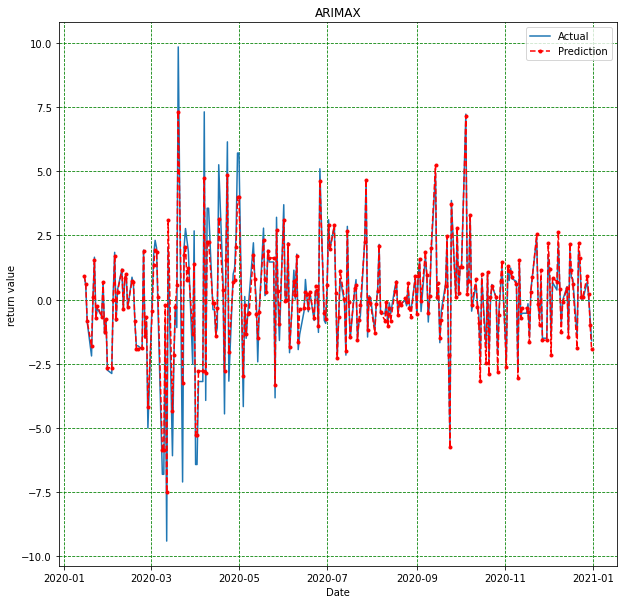

In [76]:
plt.figure(figsize=(10,10))
plt.plot(pred.index,test,label='Actual')
plt.plot(pred,label='Prediction',marker='.',linestyle='dashed',color='red')
plt.title('ARIMAX')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [ ]:
import math
test=np.nan_to_num(test)
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(test,pred))
print(rmse)

In [ ]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test,pred)
print(error)

In [ ]:
print('test mean')
test.mean()


In [ ]:
print('prediction mean')
pred.mean()

In [ ]:
from sklearn.metrics import r2_score
r2_score(test,pred)